In [356]:
#Reading dataset

import pandas as pd
import numpy as np
dfmain=pd.read_csv(r'C:\Users\Harish\Documents\4th year\DM assignment\DM original data\C-2015-DCF-Block_2H-Accreditation-2015.csv',encoding="ISO-8859–1")

In [203]:
#overall view of dataset
dfmain.notnull().sum()

id                    35647
name                  35647
survey_year           35647
is_accredited         35647
has_score              6584
accreditation_body     6584
max_score              5722
score                  5722
dtype: int64

In [204]:
dfmain.head()#first five rows

,id,name,survey_year,is_accredited,has_score,accreditation_body,max_score,score
0,20744,"Bangalore City College,No.116, Cellakere Mainr...",2015,True,True,NAAC,4.0,2.66
1,29455,College of Basic Sciences & Humanities,2015,True,False,ICAR,NaN,NaN
2,33323,Faculty of Agricultural Engineering,2015,True,False,ICAR,NaN,NaN
3,18907,"Nagar Parishad Sivaji College, Movad",2015,True,True,NAAC,4.0,2.02
4,32917,ISIC Institute of Rehabilitation Sciences,2015,True,False,NABH,NaN,NaN


In [205]:
#Dropping the rows whose accredation body value is NA
df_final=dfmain.dropna(subset=['accreditation_body'],how='any')
df_final.head()

,id,name,survey_year,is_accredited,has_score,accreditation_body,max_score,score
0,20744,"Bangalore City College,No.116, Cellakere Mainr...",2015,True,True,NAAC,4.0,2.66
1,29455,College of Basic Sciences & Humanities,2015,True,False,ICAR,NaN,NaN
2,33323,Faculty of Agricultural Engineering,2015,True,False,ICAR,NaN,NaN
3,18907,"Nagar Parishad Sivaji College, Movad",2015,True,True,NAAC,4.0,2.02
4,32917,ISIC Institute of Rehabilitation Sciences,2015,True,False,NABH,NaN,NaN


In [ ]:
#viewing the new data shape
df_final.shape

#Converting the whole data into normalised form with range (0-1) and adding it in a new column

In [207]:

df_final['normalised_score'] = df_final['score']/df_final['max_score']

C:\Users\Harish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [208]:
df_final.head()

,id,name,survey_year,is_accredited,has_score,accreditation_body,max_score,score,normalised_score
0,20744,"Bangalore City College,No.116, Cellakere Mainr...",2015,True,True,NAAC,4.0,2.66,0.665
1,29455,College of Basic Sciences & Humanities,2015,True,False,ICAR,NaN,NaN,NaN
2,33323,Faculty of Agricultural Engineering,2015,True,False,ICAR,NaN,NaN,NaN
3,18907,"Nagar Parishad Sivaji College, Movad",2015,True,True,NAAC,4.0,2.02,0.505
4,32917,ISIC Institute of Rehabilitation Sciences,2015,True,False,NABH,NaN,NaN,NaN


In [209]:
#filling the NA colums with -1 in the normalised column
df_final['normalised_score'].fillna(-1, inplace=True)
df_final.head()

,id,name,survey_year,is_accredited,has_score,accreditation_body,max_score,score,normalised_score
0,20744,"Bangalore City College,No.116, Cellakere Mainr...",2015,True,True,NAAC,4.0,2.66,0.665
1,29455,College of Basic Sciences & Humanities,2015,True,False,ICAR,NaN,NaN,-1.000
2,33323,Faculty of Agricultural Engineering,2015,True,False,ICAR,NaN,NaN,-1.000
3,18907,"Nagar Parishad Sivaji College, Movad",2015,True,True,NAAC,4.0,2.02,0.505
4,32917,ISIC Institute of Rehabilitation Sciences,2015,True,False,NABH,NaN,NaN,-1.000


In [355]:

#df_final.head()

In [211]:
# Making the max score to a constant value as we did the normalisation to the score
df_final['max_score'].fillna(1,inplace=True)

In [212]:
df_final.head()

,id,name,survey_year,is_accredited,has_score,accreditation_body,max_score,score,normalised_score
0,20744,"Bangalore City College,No.116, Cellakere Mainr...",2015,True,True,NAAC,4.0,2.66,0.665
1,29455,College of Basic Sciences & Humanities,2015,True,False,ICAR,1.0,NaN,-1.000
2,33323,Faculty of Agricultural Engineering,2015,True,False,ICAR,1.0,NaN,-1.000
3,18907,"Nagar Parishad Sivaji College, Movad",2015,True,True,NAAC,4.0,2.02,0.505
4,32917,ISIC Institute of Rehabilitation Sciences,2015,True,False,NABH,1.0,NaN,-1.000


#Apply the data preprocessing techniques to fill NA values with suitable mean for discrete data


In [319]:
df_nonzero = (df_final['normalised_score'])
df_nonzero=df_nonzero.astype(np.float16)
#df_nonzero

In [276]:
#finding the mean of the last column excluding the NA data and zero data
non = [x for x in df_nonzero.values if x > 0]
mean1 = np.mean(non)
mean1

0.6803497386659271

In [326]:
#non = [x for x in df_final['normalised_score'].values if float(x) > 0]
#non = [x for x in df_nonzero.values if x < 0]

#Replacing the mean values in the row with NA or outlier data
l = []
for i in df_nonzero.values:
    if i < 0:
        l.append(mean1)
    else:
        l.append(i)

In [357]:
df_final['normalised_score'] = l
#df_final

In [330]:
#filling the Row in the score column with mean as we have normalised the max_score .
df_final['score'].fillna(mean1,inplace=True)
df_final.replace(to_replace =-1, 
                 value =mean1)

,id,name,survey_year,is_accredited,has_score,accreditation_body,max_score,score,normalised_score
0,20744,"Bangalore City College,No.116, Cellakere Mainr...",2015,True,True,NAAC,4.0,2.660000,0.665039
1,29455,College of Basic Sciences & Humanities,2015,True,False,ICAR,1.0,0.680176,0.680176
2,33323,Faculty of Agricultural Engineering,2015,True,False,ICAR,1.0,0.680176,0.680176
3,18907,"Nagar Parishad Sivaji College, Movad",2015,True,True,NAAC,4.0,2.020000,0.504883
4,32917,ISIC Institute of Rehabilitation Sciences,2015,True,False,NABH,1.0,0.680176,0.680176
5,42904,"K.M. Asgar Hussain Education College, Akola",2015,True,True,NAAC,4.0,2.610000,0.652344
6,30712,"Ved Nursing College, 98, Milestone, G.T.Road, ...",2015,True,False,Indian nursing council,1.0,0.680176,0.680176
7,43229,"Shri Shivaji Science College , Morshi Road , A...",2015,True,True,NAAC,4.0,3.130000,0.782715
8,42953,"Shri Pundalik Maharaj College, Nandura Rly.",2015,True,True,NAAC,4.0,2.100000,0.524902
9,42952,"Dr.Babasaheb Ambedkar mahavidyalaya , Amravati.",2015,True,True,NAAC,4.0,2.250000,0.562500


In [331]:
#saving the dataframe to csv file 
df_final.to_csv("categorical_data.csv")

In [332]:
#Reading the saved dataframe   
data_dupe =pd.read_csv(r'C:\Users\Harish\Documents\4th year\DM assignment\Data mining codes\categorical_data.csv',encoding="ISO-8859–1")

Dropping constant columns and replacing the categorical columns with numerical using encoding

In [358]:
from sklearn import preprocessing

In [359]:
encoder = preprocessing.LabelEncoder()
data_dupe['has_score'] = encoder.fit_transform(data_dupe['has_score'])
data_dupe['is_accredited'] = encoder.fit_transform(data_dupe['is_accredited'])
data_dupe['accreditation_body'] = encoder.fit_transform(data_dupe['accreditation_body'])
data_dupe['name'] = encoder.fit_transform(data_dupe['name'])



#Saving the encoded information in dictionaries

In [360]:
nameDict = {}
isaccreditedDict = {}
accreditedBodyDict= {}
hasScoreDict = {}
for i in range(data_dupe.shape[0]):
    accreditedBodyDict[df_final['accreditation_body'].iloc[i]] = data_dupe['accreditation_body'].iloc[i]
    hasScoreDict[df_final['has_score'].iloc[i]] = data_dupe['has_score'].iloc[i]
    isaccreditedDict[df_final['is_accredited'].iloc[i]] = data_dupe['is_accredited'].iloc[i]
    nameDict[df_final['name'].iloc[i]] = data_dupe['name'].iloc[i]
#print(accreditedBodyDict)
#print(hasScoreDict)
#print(isaccreditedDict)
#print(nameDict)


In [361]:
f = open("dict_name.txt","w")
f.write( str(nameDict) )
f.close()

In [362]:
f = open("dict_accrebody.txt","w")
f.write( str(accreditedBodyDict) )
f.close()

In [363]:
f = open("dict_hasScore.txt","w")
f.write( str(hasScoreDict) )
f.close()

#Saving the post preprocessed data and Plotting the possible plots


In [364]:
data_dupe.to_csv('post_cleaning.csv')

In [365]:
df_cleaned =pd.read_csv(r'C:\Users\Harish\Documents\4th year\DM assignment\Data mining codes\post_cleaning.csv',encoding="ISO-8859–1")

In [366]:
from matplotlib import pyplot as plt

In [368]:
df_cleaned.drop(df_cleaned.columns[[0, 1]], axis = 1, inplace = True) 


In [369]:
df_cleaned

,id,name,survey_year,is_accredited,has_score,accreditation_body,max_score,score,normalised_score
0,20744,656,2015,1,1,358,4.0,2.660000,0.665039
1,29455,1046,2015,1,0,159,1.0,0.680176,0.680176
2,33323,1494,2015,1,0,159,1.0,0.680176,0.680176
3,18907,3662,2015,1,1,358,4.0,2.020000,0.504883
4,32917,2406,2015,1,0,361,1.0,0.680176,0.680176
5,42904,2665,2015,1,1,358,4.0,2.610000,0.652344
6,30712,5960,2015,1,0,239,1.0,0.680176,0.680176
7,43229,5143,2015,1,1,358,4.0,3.130000,0.782715
8,42953,5108,2015,1,1,358,4.0,2.100000,0.524902
9,42952,1426,2015,1,1,358,4.0,2.250000,0.562500


In [370]:
y=df_cleaned['accreditation_body'].values
x=df_cleaned['normalised_score'].values

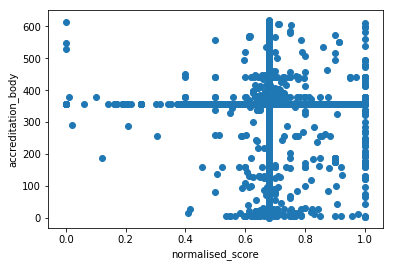

In [384]:
plt.scatter(x, y)

plt.xlabel('normalised_score')
plt.ylabel('accreditation_body')
plt.savefig('accre_normal.png')
plt.show()



In [372]:
#type(df_cleaned['normalised_score'].iloc[0])

In [373]:
z=df_cleaned['name'].values

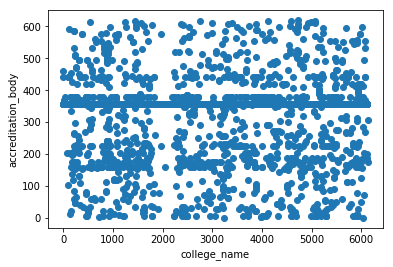

In [387]:
plt.scatter(z,y)
plt.xlabel('college_name')
plt.ylabel('accreditation_body')
plt.savefig('accre_collname.png')
plt.show()